# Regresión Logistica para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mainpath = "E:/Curso de Python/Repositorio/python-ml-course/datasets/"
filepath = "bank/bank.csv"
data = pd.read_csv(os.path.join(mainpath,filepath))

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.shape

(4119, 21)

In [5]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
data["y"] = (data["y"] == "yes").astype(int)

## En este background la variable de educacion es muy importante, se categorizará

In [7]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [8]:
data["education"] = np.where(data["education"] == "basic.4y","Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.6y","Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.9y","Basic", data["education"])

data["education"] = np.where(data["education"] == "high.school","High School", data["education"])
data["education"] = np.where(data["education"] == "professional.course","Professional Course", data["education"])
data["education"] = np.where(data["education"] == "university.degree","University Degree", data["education"])

data["education"] = np.where(data["education"] == "illiterate","Illiterate", data["education"])
data["education"] = np.where(data["education"] == "unknown","Unknown", data["education"])


In [9]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

## Se realiza un Análisis exploratorio

In [10]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [11]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [12]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


In [13]:
pd.crosstab(data.education, data.y)

y,0,1
education,,
Basic,1133,98
High School,824,97
Illiterate,1,0
Professional Course,470,65
University Degree,1099,165
Unknown,141,26


Text(0, 0.5, 'Frecuencia de compra del producto')

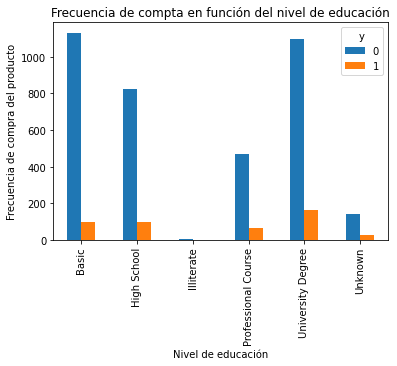

In [14]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind = "bar")
plt.title("Frecuencia de compta en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

In [15]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis = 0)

y,0,1
marital,,
divorced,0.903587,0.096413
married,0.899562,0.100438
single,0.865568,0.134432
unknown,0.909091,0.090909


Text(0, 0.5, 'Proporción de clientes')

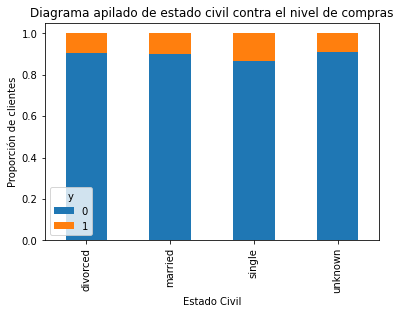

In [16]:
%matplotlib inline
table.div(table.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado Civil")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Frecuencia de compra del producto')

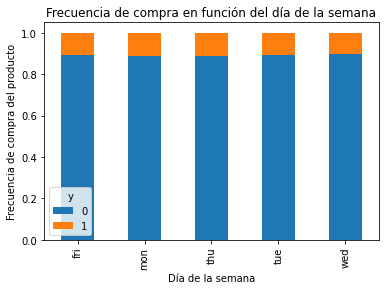

In [17]:
%matplotlib inline
table= pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

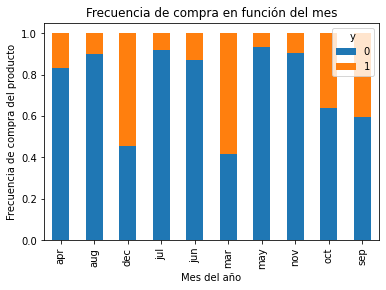

In [18]:
%matplotlib inline
table= pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

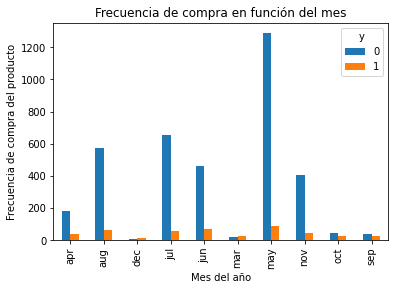

In [19]:
%matplotlib inline
table= pd.crosstab(data.month, data.y)
table.plot(kind="bar", stacked=False)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Cliente')

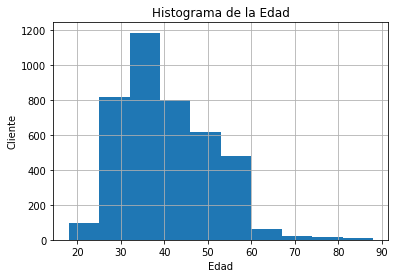

In [20]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

<AxesSubplot:xlabel='age'>

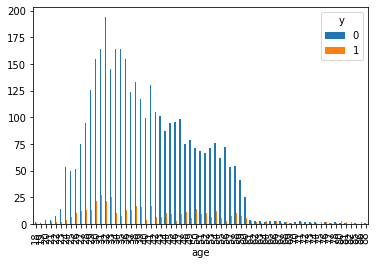

In [21]:
pd.crosstab(data.age, data.y).plot(kind="bar")

<AxesSubplot:xlabel='poutcome'>

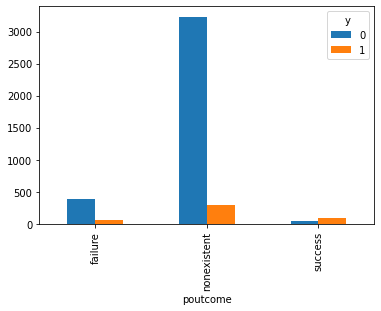

In [22]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

## Como hay multiples variables categóricas, se necesitan pasar a variables dummies

### Converción automática de las variables categórivas a dummies

In [23]:
categories = ["job", "marital", "education","default","housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"]
newCat = []
for category in categories:
    cat_list = "cat"+"_"+category
    cat_dummies = pd.get_dummies(data[category], prefix = cat_list)
    newCat.append(cat_list)
    data = data.join(cat_dummies)

In [24]:
data_vars = data.columns.tolist()

In [25]:
toKeep = [v for v in data_vars if v not in categories]

In [26]:
bankData = data[toKeep]
bankDataVars = bankData.columns.tolist()

In [27]:
Y = bankData["y"]
xCols = [v for v in bankDataVars if v != "y"]
X = bankData[xCols]

### Selección de rasgos para el modelo
### Se usará la libreria sklearn para elegir las variables y la libreria statsmodles.api  para poder usar la función de summary

In [28]:
import statsmodels.api as sm
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [29]:
from tabulate import tabulate

In [30]:
n = 15 # numero de variables (lo haremos con skilearn, la libreria escoje automáticamente las variables)
# Ver si se puede con statsmodels.api por la funcion de summary
lr = LogisticRegression()
rfe = RFE(lr,n)
rfe = rfe.fit(X,Y)

In [31]:
len(rfe.support_),len(xCols),len(bankDataVars)

(61, 61, 62)

In [32]:
varIncluded = list(zip(xCols,rfe.support_,rfe.ranking_))
print(tabulate(varIncluded))
cols = [v[0] for v in varIncluded if v[1] == True]

---------------------------------  -  --
age                                0  39
duration                           0  38
campaign                           0  14
pdays                              0  41
previous                           0  44
emp.var.rate                       0   9
cons.price.idx                     0  21
cons.conf.idx                      0  17
euribor3m                          1   1
nr.employed                        0  31
cat_job_admin.                     0   5
cat_job_blue-collar                1   1
cat_job_entrepreneur               1   1
cat_job_housemaid                  0  37
cat_job_management                 1   1
cat_job_retired                    0   2
cat_job_self-employed              1   1
cat_job_services                   0  22
cat_job_student                    0  32
cat_job_technician                 0   4
cat_job_unemployed                 0   3
cat_job_unknown                    0  43
cat_marital_divorced               0  13
cat_marital_marr

In [33]:
cols # Las doce variables que se incluyen en el modelo

['euribor3m',
 'cat_job_blue-collar',
 'cat_job_entrepreneur',
 'cat_job_management',
 'cat_job_self-employed',
 'cat_education_Unknown',
 'cat_contact_cellular',
 'cat_month_dec',
 'cat_month_jul',
 'cat_month_jun',
 'cat_month_mar',
 'cat_month_may',
 'cat_poutcome_failure',
 'cat_poutcome_nonexistent',
 'cat_poutcome_success']

# Implementación del modelo en Python con statsmodel.api
### Ahora que se tiene las columnas que se incluiran en el modelo, se usara la libreria de statsmodels <3

In [34]:
import statsmodels.api as sm

In [35]:
X = bankData[cols]

In [36]:
logitModel = sm.Logit(Y,X)

In [37]:
result = logitModel.fit()

Optimization terminated successfully.
         Current function value: 0.276421
         Iterations 7


In [38]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                 Logit              Pseudo R-squared:   0.200      
Dependent Variable:    y                  AIC:                2307.1580  
Date:                  2021-01-19 17:28   BIC:                2402.0085  
No. Observations:      4119               Log-Likelihood:     -1138.6    
Df Model:              14                 LL-Null:            -1422.9    
Df Residuals:          4104               LLR p-value:        2.4352e-112
Converged:             1.0000             Scale:              1.0000     
No. Iterations:        7.0000                                            
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
euribor3m                -0.4777   0.0400 -11.9330 0.0000 -0.5562 -0.3992
cat_job_blue-collar      -0.3657   0.1576  -2.3209 0.0203 -0.6746 -0.0569
cat_job_entrepreneur     -0.5049   0.3793  -1.3310 0.1832 -1.2483  0.2386
cat_job_management       -0.3763   0.2221  -1.6941 0.0902 -0.8117  0.0591
cat_job_self-employed    -0.5032   0.3247  -1.5496 0.1212 -1.1397  0.1333
cat_education_Unknown     0.2165   0.2535   0.8541 0.3930 -0.2803  0.7134
cat_contact_cellular      0.3184   0.1659   1.9187 0.0550 -0.0069  0.6436
cat_month_dec             1.0391   0.4723   2.2002 0.0278  0.1135  1.9648
cat_month_jul             0.3368   0.1840   1.8300 0.0673 -0.0239  0.6975
cat_month_jun             0.6533   0.1874   3.4872 0.0005  0.2861  1.0205
cat_month_mar             1.4069   0.3239   4.3441 0.0000  0.7721  2.0416
cat_month_may            -0.6774   0.1486  -4.5599 0.0000 -0.9686 -0.3863
cat_poutcome_failure     -1.1356   0.2483  -4.5735 0.0000 -1.6222 -0.6489
cat_poutcome_nonexistent -0.8587   0.2287  -3.7543 0.0002 -1.3069 -0.4104
cat_poutcome_success      0.8366   0.2633   3.1767 0.0015  0.3204  1.3527
=========================================================================

"""

In [39]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4104
Method:                           MLE   Df Model:                           14
Date:                Tue, 19 Jan 2021   Pseudo R-squ.:                  0.1998
Time:                        17:28:45   Log-Likelihood:                -1138.6
converged:                       True   LL-Null:                       -1422.9
Covariance Type:            nonrobust   LLR p-value:                2.435e-112
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
euribor3m                   -0.4777      0.040    -11.933      0.000      -0.556      -0.399
cat_job_blue-collar         -0.3657      0.158     -2.321      0.020      -0.675      -0.057
cat_job_entrepreneur        -0.5049      0.379     -1.331      0.183      -1.248       0.239
cat_job_management          -0.3763      0.222     -1.694      0.090      -0.812       0.059
cat_job_self-employed       -0.5032      0.325     -1.550      0.121      -1.140       0.133
cat_education_Unknown        0.2165      0.254      0.854      0.393      -0.280       0.713
cat_contact_cellular         0.3184      0.166      1.919      0.055      -0.007       0.644
cat_month_dec                1.0391      0.472      2.200      0.028       0.113       1.965
cat_month_jul                0.3368      0.184      1.830      0.067      -0.024       0.698
cat_month_jun                0.6533      0.187      3.487      0.000       0.286       1.021
cat_month_mar                1.4069      0.324      4.344      0.000       0.772       2.042
cat_month_may               -0.6774      0.149     -4.560      0.000      -0.969      -0.386
cat_poutcome_failure        -1.1356      0.248     -4.573      0.000      -1.622      -0.649
cat_poutcome_nonexistent    -0.8587      0.229     -3.754      0.000      -1.307      -0.410
cat_poutcome_success         0.8366      0.263      3.177      0.001       0.320       1.353
============================================================================================
"""

# Implementación del modelo con scikit-learn

In [40]:
from sklearn import linear_model

In [41]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression()

In [42]:
logit_model.score(X,Y)

0.9016751638747269

In [43]:
print(tabulate(list(zip(X.columns, np.transpose(logit_model.coef_)))))

------------------------  ---------
euribor3m                 -0.482121
cat_job_blue-collar       -0.353179
cat_job_entrepreneur      -0.447161
cat_job_management        -0.35026
cat_job_self-employed     -0.43915
cat_education_Unknown      0.203222
cat_contact_cellular       0.297894
cat_month_dec              0.834657
cat_month_jul              0.319136
cat_month_jun              0.613935
cat_month_mar              1.26162
cat_month_may             -0.694561
cat_poutcome_failure      -0.725423
cat_poutcome_nonexistent  -0.460569
cat_poutcome_success       1.18594
------------------------  ---------


## Validación del modelo logístico

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [46]:
lm = linear_model.LogisticRegression()
lm.fit(X_train,Y_train)

LogisticRegression()

$$\huge{Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}}$$

In [47]:
probs = lm.predict_proba(X_test)

In [48]:
probs

array([[0.95214697, 0.04785303],
       [0.89441564, 0.10558436],
       [0.9320436 , 0.0679564 ],
       ...,
       [0.70560581, 0.29439419],
       [0.98050437, 0.01949563],
       [0.18346193, 0.81653807]])

In [49]:
prediction = lm.predict(X_test)

In [50]:
prediction

array([0, 0, 0, ..., 0, 0, 1])

$$\huge{\varepsilon \in (0,1),Y_p=\begin{cases}0& si\ p\leq\varepsilon\\1&si\ p >\varepsilon\end{cases}}$$

In [51]:
probs = probs[:,1]
prob_df = pd.DataFrame(probs)
thereshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>thereshold, 1, 0)

In [52]:
prob_df.head(10)

,0,prediction
0,0.047853,0
1,0.105584,1
2,0.067956,0
3,0.071878,0
4,0.057478,0
5,0.019496,0
6,0.014465,0
7,0.115386,1
8,0.037914,0
9,0.065922,0


In [53]:
pd.crosstab(prob_df.prediction, columns = "count")

col_0,count
prediction,
0,873
1,363


In [54]:
thereshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>thereshold, 1, 0)
pd.crosstab(prob_df.prediction, columns = "count")

col_0,count
prediction,
0,1024
1,212


In [55]:
thereshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>thereshold, 1, 0)
pd.crosstab(prob_df.prediction, columns = "count")

col_0,count
prediction,
0,352
1,884


## Comprobar la eficacia del modelo

In [56]:
from sklearn import metrics

In [57]:
metrics.accuracy_score(Y_test,prediction)

0.9061488673139159

## Validación Cruzada

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
scores = cross_val_score(linear_model.LogisticRegression(),X,Y,scoring = "accuracy", cv = 5)

In [60]:
scores

array([0.91019417, 0.89927184, 0.90412621, 0.88834951, 0.90036452])

In [61]:
scores.mean()

0.9004612535242836

## Matrices de Confusión y curvas ROC

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [63]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [64]:
probs = lm.predict_proba(X_test)

In [65]:
prob = probs [:,1]
prob_df = pd.DataFrame(prob)
thereshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>=thereshold,1,0)
prob_df["actual"] = list(Y_test)

In [66]:
prob_df.head()

,0,prediction,actual
0,0.047853,0,0
1,0.105584,1,0
2,0.067956,0,0
3,0.071878,0,0
4,0.057478,0,0


Se crea la matriz de confusión

In [67]:
confusion_matrix =  pd.crosstab(prob_df.prediction, prob_df.actual)

In [68]:
confusion_matrix

actual,0,1
prediction,,
0,829,44
1,285,78


In [69]:
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FN=confusion_matrix[0][1]
FP=confusion_matrix[1][0]

In [70]:
sens = TP/(TP+FN)
sens

0.21487603305785125

In [71]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.05040091638029787

In [72]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]

sensitivities = [1]
especifities_1 = [1]

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0]>=t, 1, 0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN=confusion_matrix[0][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    FN=confusion_matrix[1][0]
    
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

In [73]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

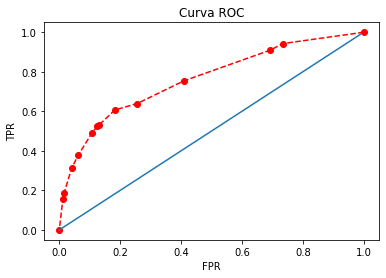

In [74]:
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curva ROC")

### Con SciKit Learn se puede hacer automático 

In [81]:
from sklearn import metrics
from pandas import Timestamp
import plotnine as p9
# Como no pude usar ggplot use plotnine
# Solución tentativa a problema ggplot: https://stackoverflow.com/questions/58143253/module-pandas-has-no-attribute-tslib

In [77]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob) #_ tercer valor que no se utiliza

In [78]:
df = pd.DataFrame({
    "esp":espc_1,
    "sens":sensit
})

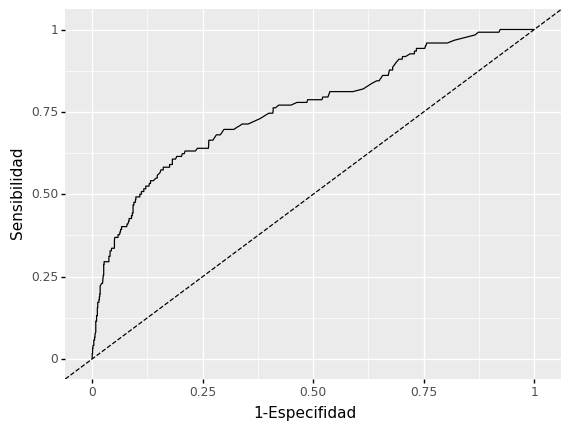

{<ggplot: (103608047749)>}

In [83]:
{
    p9.ggplot(df, p9.aes(x="esp", y="sens")) +
    p9.geom_line() + 
    p9.geom_abline(linetype="dashed") +
    p9.xlim(-0.01,1.01) +
    p9.ylim(-0.01,1.01) +
    p9.xlab("1-Especifidad") +
    p9.ylab("Sensibilidad")
}

In [84]:
auc = metrics.auc(espc_1, sensit)
auc

0.7591900403213939

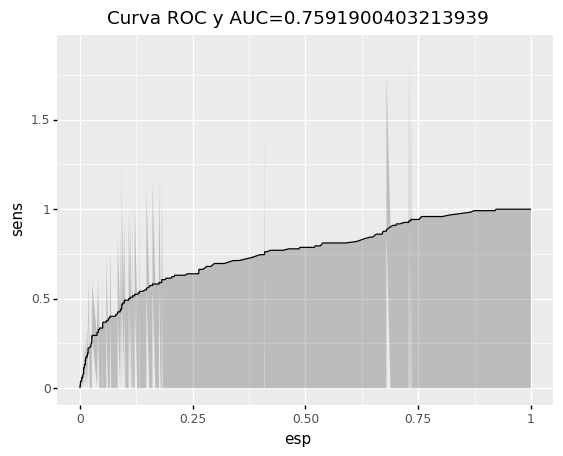

{<ggplot: (103608018059)>}

In [85]:
{
    p9.ggplot(df, p9.aes(x="esp", y="sens")) + 
    p9.geom_area(alpha=0.25) +
    p9.geom_line(p9.aes(y="sens")) +
    p9.ggtitle("Curva ROC y AUC=%s"%str(auc))
}